In [1]:
import sys
sys.path.append("/u/dssc/zenocosini/helm_suite/MCQA_Benchmark")

from metrics.query import DataFrameQuery
from common.utils import *
from metrics.utils import *
from common.config_plot import plot_config
from utils import *

import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from dataclasses import dataclass

# !export OMP_NUM_THREADS=1

import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.decomposition import KernelPCA
from sklearn.metrics import pairwise_distances
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.patches as mpatches
import matplotlib as mpl 
import seaborn as sns
_PATH_RESULT = Path("/orfeo/cephfs/home/dssc/zenocosini/helm_suite/MCQA_Benchmark/metrics/cluster_cartoon")



In [2]:
pipeline = Pipeline()
pipeline.run()

Iteration with model:llama-3-70b, shot:0, layer:69
Iteration with model:llama-3-70b, shot:0, layer:73
Iteration with model:llama-3-70b, shot:4, layer:69
Iteration with model:llama-3-70b, shot:4, layer:73
Iteration with model:llama-3-70b-chat, shot:0, layer:69
Iteration with model:llama-3-70b-chat, shot:0, layer:73
Iteration with model:llama-2-70b, shot:0, layer:69
Iteration with model:llama-2-70b, shot:0, layer:73
Iteration with model:llama-2-70b, shot:4, layer:69
Iteration with model:llama-2-70b, shot:4, layer:73
Iteration with model:llama-2-70b-chat, shot:0, layer:69
Iteration with model:llama-2-70b-chat, shot:0, layer:73


# Plot Subject

In [57]:
sns.color_palette("coolwarm", 100)[0]

[(0.2389484589019608, 0.3123654946588235, 0.7656759021764705),
 (0.2526625972549019, 0.3328367876470588, 0.7836650259411765),
 (0.26180535615686273, 0.3464843163058824, 0.795657775117647),
 (0.27582712294117645, 0.36671691552941177, 0.812552935372549),
 (0.28527277752941177, 0.38012942263529415, 0.8234685512470589),
 (0.2994412594117647, 0.40024818329411765, 0.8398419750588235),
 (0.30906031906666664, 0.41349827226666663, 0.8501276338666667),
 (0.32371841525490197, 0.4331584405490196, 0.864722355372549),
 (0.33349047938039217, 0.44626521940392155, 0.8744521697098039),
 (0.34832334141176474, 0.4657111465098039, 0.8883461629411764),
 (0.3584149773647059, 0.47842617007058824, 0.8967946455764706),
 (0.37355243129411764, 0.4974987054117647, 0.9094673695294118),
 (0.383662065772549, 0.5101834172862746, 0.9178306732313726),
 (0.39923148431372546, 0.5285284721568628, 0.9284591027843138),
 (0.41480090285490195, 0.5468735270274511, 0.939087532337255),
 (0.42519897019607844, 0.559058179764706, 0.9460614570784314),
 (0.4411227243607843, 0.5765318648470589, 0.9545453433843137),
 (0.4517385604705882, 0.5881809882352941, 0.9602012675882352),
 (0.46767809468235294, 0.6055912316235293, 0.9685462810941176),
 (0.4784622512941176, 0.6165636436078431, 0.9727208954313725),
 (0.49463848621176465, 0.6330222615843136, 0.9789828169372549),
 (0.5054226428235293, 0.6439946735686275, 0.9831574312745098),
 (0.5216962808313725, 0.6595986063529412, 0.9877360232470589),
 (0.5325682374117646, 0.6698005978823529, 0.9903932701176471),
 (0.5488761722823529, 0.6851035851764705, 0.9943791404235295),
 (0.5597467255686274, 0.6947677280784313, 0.9960753091764706),
 (0.5760512925333333, 0.7087798786666667, 0.997754592),
 (0.5869210038431373, 0.7181213123921568, 0.9988741138823529),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.6193179451882354, 0.7441207347647059, 0.9989309188196078),
 (0.6300885300352941, 0.7525162397058823, 0.9985080123411765),
 (0.6461128107647058, 0.7644364965294117, 0.9968684625058823),
 (0.6566828675490196, 0.7718064767647058, 0.9949138377529412),
 (0.6725379527254902, 0.782861447117647, 0.9919819006235294),
 (0.6830556815607843, 0.790042626890196, 0.9897684281843138),
 (0.6984540864549019, 0.7994498841137254, 0.9845774567019608),
 (0.7087196897176471, 0.8057213889294117, 0.9811168090470588),
 (0.724041371882353, 0.8149103926470588, 0.9756509706470589),
 (0.7338977872549018, 0.8200178787647059, 0.9707243660980392),
 (0.7486824103137254, 0.8276791079411765, 0.9633344592745098),
 (0.7585388256862745, 0.8327865940588235, 0.9584078547254902),
 (0.7727059486039215, 0.8389782172392156, 0.9493187599137255),
 (0.7820491171058823, 0.8428642126588235, 0.9429798432705883),
 (0.7960638698588236, 0.8486932057882353, 0.9334714683058823),
 (0.8093286703529411, 0.8529739995529412, 0.9223225884705882),
 (0.8180564934117647, 0.8555896775450981, 0.9146376165490196),
 (0.831148228, 0.8595131945333333, 0.9031101586666667),
 (0.839351442772549, 0.861166825654902, 0.8944937634156863),
 (0.8513716370313725, 0.8631253107372548, 0.8810638238392158),
 (0.8593850998705882, 0.8644309674588235, 0.8721105307882353),
 (0.8714925112588235, 0.8623093793176471, 0.8570162640588236),
 (0.8796222636039216, 0.8581749384078431, 0.845843868137255),
 (0.8918168921215687, 0.8519732770431372, 0.829085274254902),
 (0.8995432066000001, 0.8475002359999999, 0.8177890744),
 (0.9094595977529412, 0.8393864797647058, 0.8003313524235294),
 (0.9160705251882353, 0.8339773089411765, 0.7886928711058824),
 (0.925563423, 0.8255172980705883, 0.7711363078117647),
 (0.933221183, 0.8155568504470588, 0.7531514321411764),
 (0.9383263563333333, 0.8089165520313726, 0.741161515027451),
 (0.945540298909804, 0.7986057405333333, 0.7231054172980392),
 (0.9491505082901961, 0.7907852690666667, 0.7108755943019608),
 (0.9545658223607844, 0.7790545618666667, 0.6925308598078431),
 (0.9581760317411765, 0.7712340904, 0.6803010368117647),
 (0.9616447383764706, 0.7580291825411765, 0.6617823791647058),
 (0.9

In [5]:
def extract_data(data,model, shot, layer=5):
    query = f"model=='{model}' and shot=={shot} and layer=={layer}"
    result = data.query(query)
    return result


In [2]:
def plot_cartoon_binary(data, model,shot,layer=5):
    # Setting the plot style globally
    sns.set_style(

            rc={"axes.edgecolor": ".15"},
        )
    
    fig, ax = plt.subplots()
    data = extract_data(data,model,shot,layer)
    model = data["model"].values[0]
    shot = data["shot"].values[0]
    layer = data["layer"].values[0]
    most_represented = data["most_represented"].values[0]
    distance_matrix = data["distance_matrix"].values[0]
    cluster_counts = data["cluster_counts"].values[0]
    
    # MDS and clustering visualization
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    positions = mds.fit_transform(distance_matrix)
    clusters, counts = zip(*sorted(cluster_counts.items()))
    
    norm = Normalize(vmin=0, vmax=1)
    cmap = sns.color_palette("coolwarm", as_cmap=True)
#plt.cm.coolwarm
    scalar_map = ScalarMappable(norm=norm, cmap=cmap)
    scalar_map.set_array([]) 
    norm = mpl.colors.Normalize(vmin=0, vmax=2) 
    base_colors = {"STEM": np.array(sns.color_palette("coolwarm",1000)[0]),  "not STEM": np.array(sns.color_palette("coolwarm",1000)[-1])}
    
    def compute_cluster_color(fraction_dict):
        color = base_colors["STEM"]*fraction_dict + (1-fraction_dict)*base_colors["not STEM"]
        
        return color
    
    # Compute the colors for each cluster
    def get_cluster_colors(fraction_series):
        colors = []
        for fraction_dict in fraction_series:
            colors.append(compute_cluster_color(fraction_dict))
        return colors

    # Get the colors for each cluster
    # cluster_colors = get_cluster_colors(most_represented["percentage"])
    cluster_colors = scalar_map.to_rgba(most_represented["percentage"])
    
    for pos, count, cluster, color in zip(positions, counts, clusters, cluster_colors):
        ax.scatter(pos[0], pos[1], s=3*count, color=color, label=f'Cluster {cluster}', edgecolors='black', linewidth=1)
    
    
    plt.title(f"{shot} shot {'finetuned' if 'ft' in model else ''}", fontsize=31)
    plt.tick_params(which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    left=False,         # ticks along the top edge are off
                    labelbottom=False,
                    labelleft=False) 
    fig.tight_layout()
    patches = [mpatches.Patch(color=value, label=f'{key}') for key,value in base_colors.items()]
    ax.legend(handles=patches, fontsize=15)
    # fig.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1)
    # fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect parameter to leave space for the title
    fig.tight_layout()
    if model == "llama-3-8b" and shot == 0:
        ax.set_ylabel("early layers", fontsize=25)
    fig.subplots_adjust(top=0.85) 
    #fig.legend(handles=patches, loc = "lower left", fontsize=12)
    # plt.rcParams.update(plot_config)
    #plt.colorbar(scalar_map, label='Percentage of STEM subjects')
    fig.savefig(_PATH_RESULT / f"pics/cartoon_{model}_{shot}_{layer}.png",  bbox_inches='tight')
    fig.savefig(_PATH_RESULT / f"pics/cartoon_{model}_{shot}_{layer}.pdf", format="pdf",  bbox_inches='tight')
    fig.show()


In [3]:
# Data preparation and extraction
models = ['llama-3-8b', 
          'llama-3-8b-chat', 
          'llama-3-8b-ft']

# for model in models:
#     plot_cartoon_binary(data, model, shot='0', layer=5)
#     plot_cartoon_binary(data, model, shot='5', layer=5)
    


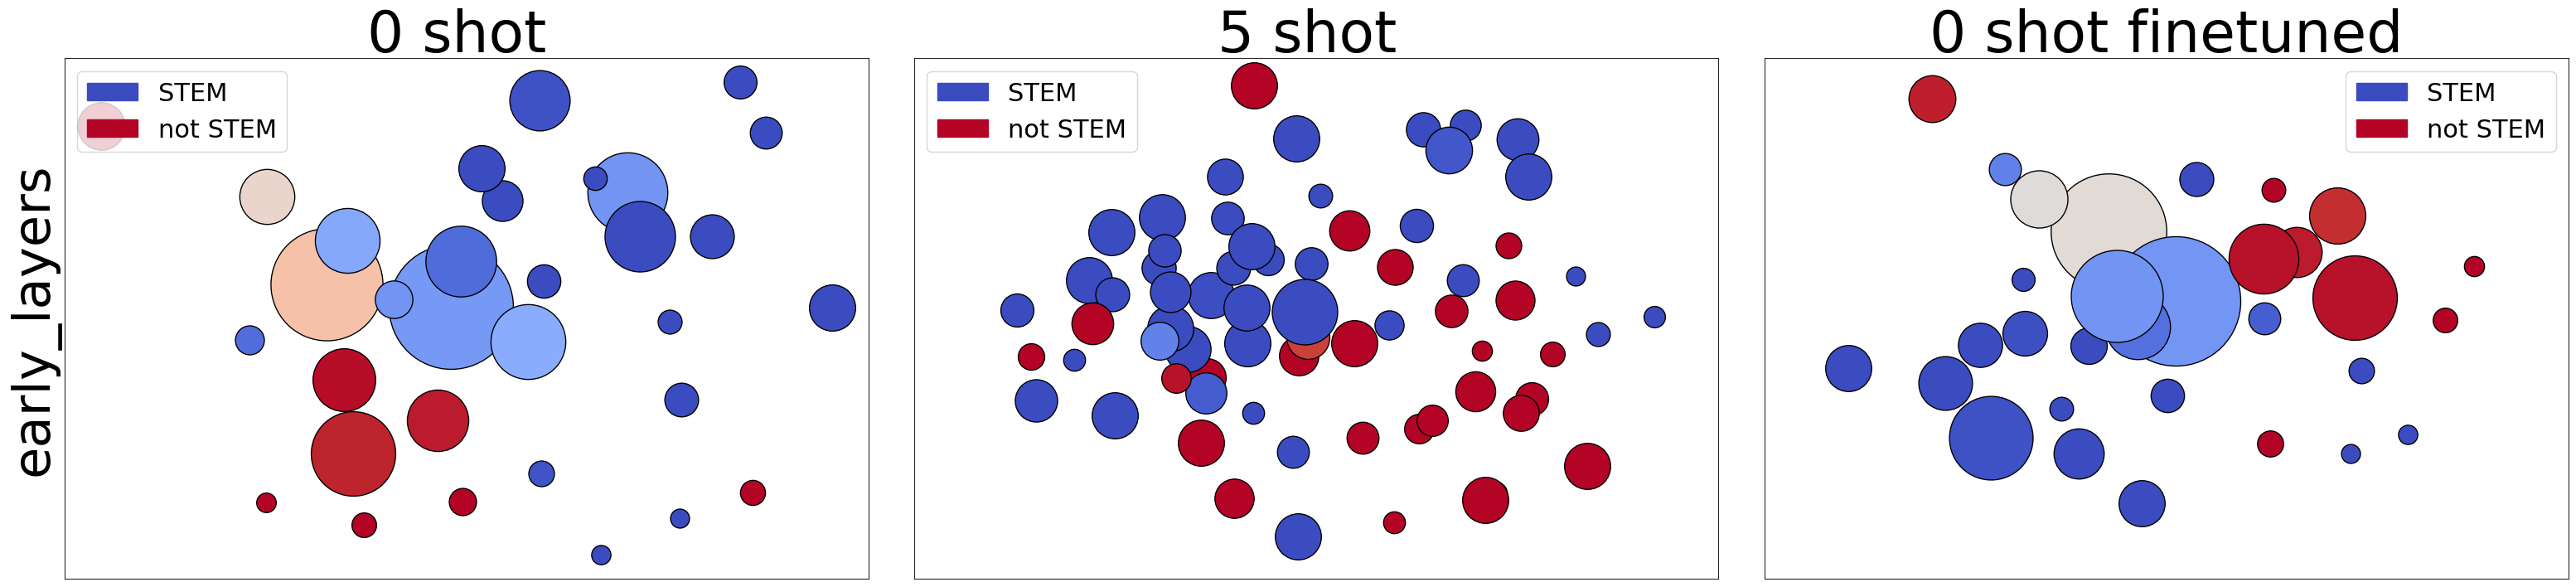

In [16]:
data = pd.read_pickle("df_result/df_binary.pkl")
# data = pd.read_pickle("df_result/df_llama_3_8b_binary.pkl")
def plot_cartoon_binary_ax(data, configurations):
    sns.set_style(rc={"axes.edgecolor": ".15"})

    # Create a figure with a gridspec layout for three subplots in a row
    plt.close()
    fig = plt.figure(figsize=(32,8))  # Adjust the figure size as needed
    gs = fig.add_gridspec(1, 3)
    base_colors = {"STEM": np.array(sns.color_palette("coolwarm",1000)[0]),  "not STEM": np.array(sns.color_palette("coolwarm",1000)[-1])}
    
    for i, (model, shot, layer) in enumerate(configurations):
        ax = fig.add_subplot(gs[0, i])
        plot_data = extract_data(data, model, shot, layer)

        # Assuming the extract_data returns a dictionary with these keys
        model = plot_data["model"].values[0]
        shot = plot_data["shot"].values[0]
        layer = plot_data["layer"].values[0]
        most_represented = plot_data["most_represented"].values[0]
        distance_matrix = plot_data["distance_matrix"].values[0]
        cluster_counts = plot_data["cluster_counts"].values[0]

        # MDS and clustering visualization
        mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
        positions = mds.fit_transform(distance_matrix)
        clusters, counts = zip(*sorted(cluster_counts.items()))

        norm = Normalize(vmin=0, vmax=1)
        cmap = sns.color_palette("coolwarm", as_cmap=True)
        scalar_map = ScalarMappable(norm=norm, cmap=cmap)
        scalar_map.set_array([])
        cluster_colors = scalar_map.to_rgba(most_represented["percentage"])

        for pos, count, cluster, color in zip(positions, counts, clusters, cluster_colors):
            ax.scatter(pos[0], pos[1], s= 8 * count, color=color, label=f'Cluster {cluster}', edgecolors='black', linewidth=1)
    
        if i == 0:
            ax.set_ylabel("early_layers", fontsize = 45)
        
        elif i == 1:
            ax.set_xlim(-13, 13)
            ax.set_ylim(-13, 13)
        elif i == 2:
            ax.set_xlim(-10, 10)
            ax.set_ylim(-10, 10)
        ax.set_title(f"{shot} shot {'finetuned' if 'ft' in model else ''}", fontsize=50)
        ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
        patches = [mpatches.Patch(color=value, label=f'{key}') for key,value in base_colors.items()]
        ax.legend(handles=patches, fontsize=22)
    #plt.rcParams.update(plot_config)
    fig.tight_layout(pad = 4)
    # fig.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1)  # Adjust spacing
    fig.savefig(_PATH_RESULT / f"pics/3_sub.png",  bbox_inches='tight')
    fig.savefig(_PATH_RESULT / f"pics/3_sub.pdf", format="pdf",  bbox_inches='tight')
    fig.show()

# Example use:
configurations = [
    ('llama-3-8b', 0, 5),
    ('llama-3-8b', 5, 7),
    ('llama-3-8b-ft', 0, 5)
]

plot_cartoon_binary_ax(data, configurations)


# Plot letter

In [275]:
sns.color_palette("coolwarm", 1000)[0]

(0.2298057, 0.298717966, 0.753683153)

In [297]:
sns.color_palette("bright")

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [294]:
sns.color_palette("rocket")[2]

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

In [7]:
data = pd.read_pickle("df_result/df_letter.pkl")
# data = pd.read_pickle("df_result/df_llama_3_8b_letter.pkl")

In [2]:
def extract_data(data,model, shot, layer=5):
    query = f"model=='{model}' and shot=={shot} and layer=={layer}"
    result = data.query(query)
    return result


In [10]:
def plot_cartoon_letter(data_all, model, shot, layer):
    # Setting the plot style globally
    data = extract_data(data_all, model, shot, layer)
    sns.set_style(
            rc={"axes.edgecolor": ".15"},
        )
    
    fig, ax = plt.subplots()
    model = data["model"].values[0]
    shot = data["shot"].values[0]
    layer = data["layer"].values[0]
    most_represented = data["most_represented"].values[0]
    distance_matrix = data["distance_matrix"].values[0]
    cluster_counts = data["cluster_counts"].values[0]
    
    # MDS and clustering visualization
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    positions = mds.fit_transform(distance_matrix)
    
    clusters, counts = zip(*sorted(cluster_counts.items()))
    
    norm = Normalize(vmin=0, vmax=1)
    cmap = plt.cm.coolwarm
    scalar_map = ScalarMappable(norm=norm, cmap=cmap)
    scalar_map.set_array([]) 
    norm = mpl.colors.Normalize(vmin=0, vmax=2) 
  
    # Define base colors for each type
    # base_colors = {
    #     "A": np.array(sns.color_palette("Paired")[3]),  # Red for type 0
    #     "B": np.array(sns.color_palette("Paired")[7]),  # Green for type 1
    #     "C": np.array(sns.color_palette("Paired")[9]),  # Blue for type 2
    #     "D": np.array(sns.color_palette("Paired")[10])   # Yellow for type 3
    # }
    # base_colors = {
    #     "A": np.array(sns.color_palette("coolwarm", 1000)[0]),  # Red for type 0
    #     "B": np.array(np.array(sns.color_palette("Paired")[3])),  # Green for type 1
    #     "C": np.array(sns.color_palette("coolwarm", 1000)[-1]),  # Blue for type 2
    #     "D": np.array(sns.color_palette("Paired")[10])   # Yellow for type 3
    # }
    base_colors = {
        "A": np.array(sns.color_palette("bright")[0]),  # Red for type 0
        "B": np.array(np.array(sns.color_palette("Paired")[3])),  # Green for type 1
        "C": np.array(sns.color_palette("bright")[3]),  # Blue for type 2
        "D": np.array(sns.color_palette("Paired")[10])   # Yellow for type 3
    }
    
    # Function to compute the blended color
    def compute_cluster_color(fraction_dict):
        color = np.zeros(3)
        for t, frac in fraction_dict.items():
            color += frac * base_colors[t]
        return color
    
    # Compute the colors for each cluster
    def get_cluster_colors(fraction_series):
        colors = []
        for fraction_dict in fraction_series:
            colors.append(compute_cluster_color(fraction_dict))
        return colors

    # Get the colors for each cluster
    cluster_colors = get_cluster_colors(most_represented["percentage"])

    # cluster_colors = scalar_map.to_rgba(most_represented["percentage"])
    
    for pos, count, cluster, color in zip(positions, counts, clusters, cluster_colors):
        ax.scatter(pos[0], pos[1], s=2*count, color=color, label=f'Cluster {cluster}', edgecolors='black', linewidth=1)
    
    
    plt.title(f"{'5' if shot==4 else '0'} shot {'finetuned' if 'chat' in model else ''}", fontsize = 31)
    # plt.xlabel('Dimension 1')
    # plt.ylabel('Dimension 2')
    fig.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1)
    fig.tight_layout(rect=[0, 0, 1, 1])
    if model == "llama-2-70b" and shot == 4 and layer == 69:
        ax.set_xlim(-15, 15)
        ax.set_ylim(-15, 15)
    elif (model == 'llama-2-70b-chat'):
        ax.set_xlim(-18, 18)
        ax.set_ylim(-18, 18)
    elif ('llama-3-70b' in model and shot == 0 and layer == 69):
        ax.set_xlim(-10, 10)
        ax.set_ylim(-10, 10)
    elif ('llama-3-70b' in model and shot == 4 and layer == 69):
        ax.set_xlim(-11, 11)
        ax.set_ylim(-11, 11)
    elif ('llama-3-70b' in model and shot == 4 and layer == 73):
        ax.set_xlim(-15, 15)
        ax.set_ylim(-15, 15)
    elif ('llama-3-70b' in model and layer == 73):
        ax.set_xlim(-12, 12)
        ax.set_ylim(-12, 12)
    plt.tick_params( which='both',      # both major and minor ticks are affected
                     bottom=False,      # ticks along the bottom edge are off
                     left=False,         # ticks along the top edge are off
                     labelbottom=False,
                     labelleft=False)
    colors_to_group = ["A","B","C","D"]
    patches = [mpatches.Patch(color=value, label=f'answer {key}') for key,value in base_colors.items()]
    ax.legend(handles=patches, fontsize = 15)
    if model == "llama-3-70b-chat" and shot == 0:
        ax.legend(handles=patches, fontsize = 15, loc = "lower right")
    elif model == "llama-2-70b-chat" and shot == 0 and layer == 69:
        ax.legend(handles=patches, fontsize = 15, loc = "lower left")
    elif ('llama-3-70b' in model and shot == 4 and layer == 73):
        ax.legend(handles=patches, fontsize = 15, loc = "lower left")
    if model == "llama-2-70b" and shot == 0 and layer == 73:
        ax.set_ylabel("late layers", fontsize = 25)
    fig.subplots_adjust(top=0.85) 
    print(f"letter_cartoon {model} {shot} {layer}")
    
    # if "chat" in model:
    #     plt.legend(handles=patches, loc = "lower left")
    plt.savefig(_PATH_RESULT / f"pics/letter_cartoon_{model}_{shot}_{layer}_alt_1.png", bbox_inches='tight')
    plt.savefig(_PATH_RESULT / f"pics/letter_cartoon_{model}_{shot}_{layer}_alt_1.pdf", format="pdf", bbox_inches='tight')
    plt.show()

    

In [16]:
# Data preparation and extraction
models = ['llama-2-70b',
          'llama-3-70b',
         'llama-3-70b-chat',
         'llama-2-70b-chat']
data = pd.read_pickle("df_result/df_llama_3_8b_letter.pkl")
# for model in models:
#     plot_cartoon_letter(data, model, shot='4', layer=69)
#     plot_cartoon_letter(data, model, shot='4', layer=73)
# plot_cartoon_letter(data, models[-1], shot='0', layer=69)

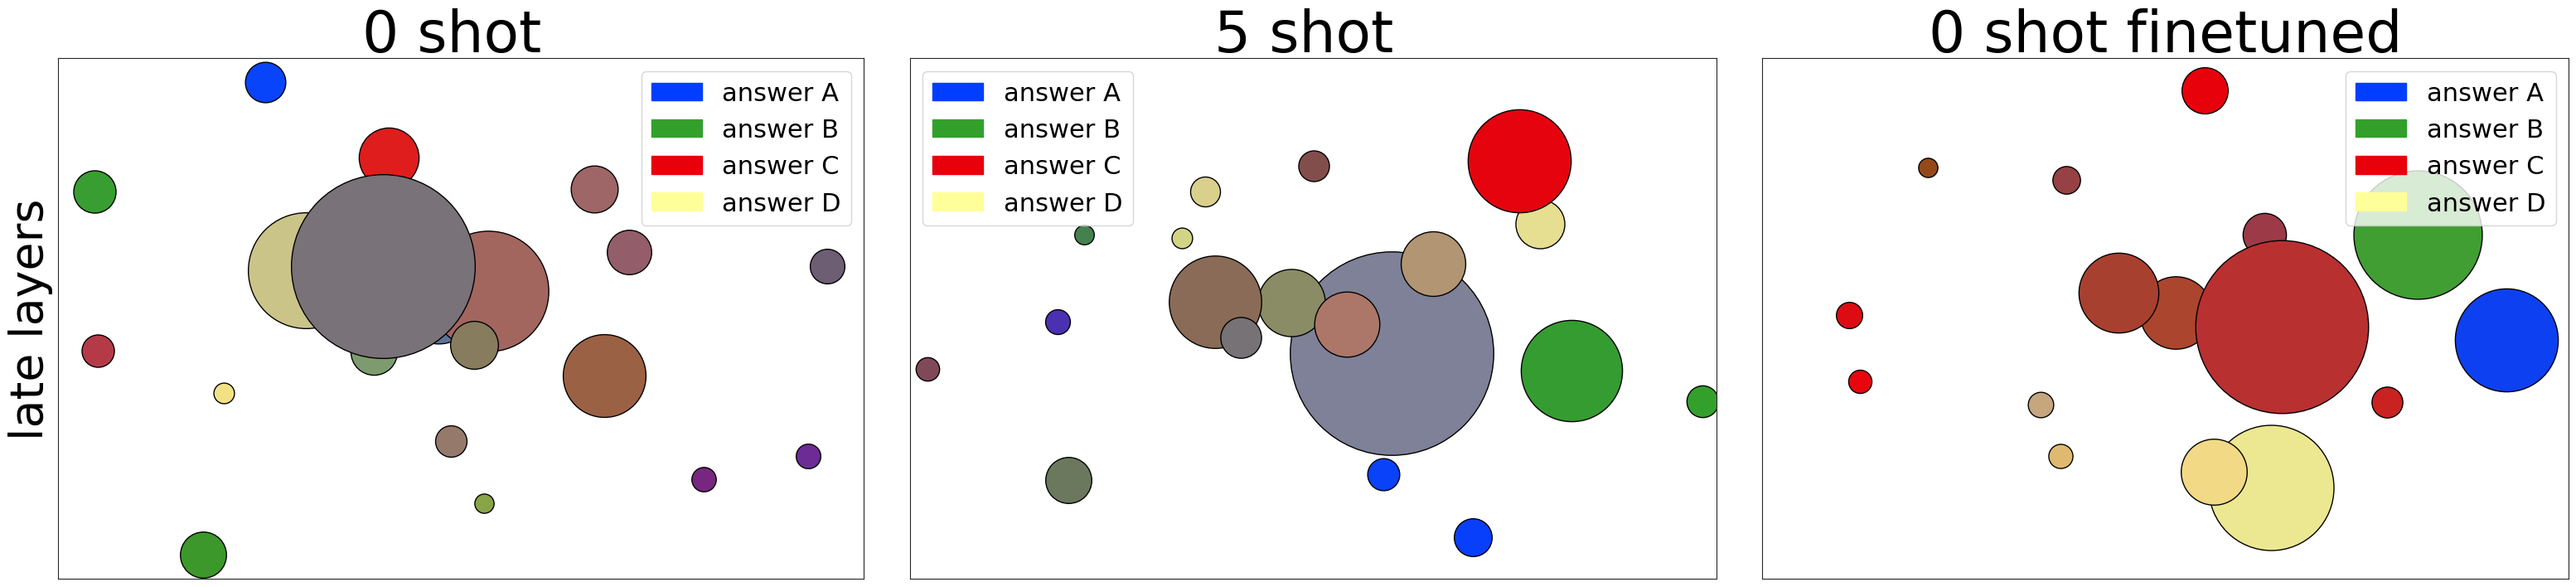

In [15]:
data = pd.read_pickle("df_result/df_llama_3_8b_letter.pkl")
def plot_cartoon_letter_ax(data, configurations):
    sns.set_style(rc={"axes.edgecolor": ".15"})

    # Create a figure with a gridspec layout for three subplots in a row
    fig = plt.figure(figsize=(32,8))  # Adjust the figure size as needed
    gs = fig.add_gridspec(1, 3)

    for i, (model, shot, layer) in enumerate(configurations):
        ax = fig.add_subplot(gs[0, i])
        plot_data = extract_data(data, model, shot, layer)

        # Assuming the extract_data returns a dictionary with these keys
        model = plot_data["model"].values[0]
        shot = plot_data["shot"].values[0]
        layer = plot_data["layer"].values[0]
        most_represented = plot_data["most_represented"].values[0]
        distance_matrix = plot_data["distance_matrix"].values[0]
        cluster_counts = plot_data["cluster_counts"].values[0]

        # MDS and clustering visualization
        mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
        positions = mds.fit_transform(distance_matrix)
        clusters, counts = zip(*sorted(cluster_counts.items()))
    
        base_colors = {
            "A": np.array(sns.color_palette("bright")[0]),  # Red for type 0
            "B": np.array(np.array(sns.color_palette("Paired")[3])),  # Green for type 1
            "C": np.array(sns.color_palette("bright")[3]),  # Blue for type 2
            "D": np.array(sns.color_palette("Paired")[10])   # Yellow for type 3
        }
    
        # Function to compute the blended color
        def compute_cluster_color(fraction_dict):
            color = np.zeros(3)
            for t, frac in fraction_dict.items():
                color += frac * base_colors[t]
            return color
        
        # Compute the colors for each cluster
        def get_cluster_colors(fraction_series):
            colors = []
            for fraction_dict in fraction_series:
                colors.append(compute_cluster_color(fraction_dict))
            return colors

        # Get the colors for each cluster
        cluster_colors = get_cluster_colors(most_represented["percentage"])
    
        # cluster_colors = scalar_map.to_rgba(most_represented["percentage"])
        
        for pos, count, cluster, color in zip(positions, counts, clusters, cluster_colors):
            ax.scatter(pos[0], pos[1], s=8*count, color=color, label=f'Cluster {cluster}', edgecolors='black', linewidth=1)    
        if i == 0:
            ax.set_ylabel("early_layers", fontsize = 45)
        ax.set_title(f"{'5' if shot==4 else '0'} shot {'finetuned' if 'chat' in model else ''}", fontsize = 50)
        plt.tick_params( which='both',      # both major and minor ticks are affected
                     bottom=False,      # ticks along the bottom edge are off
                     left=False,         # ticks along the top edge are off
                     labelbottom=False,
                     labelleft=False)
        colors_to_group = ["A","B","C","D"]
        patches = [mpatches.Patch(color=value, label=f'answer {key}') for key,value in base_colors.items()]
        ax.legend(handles=patches, fontsize = 22)
        if model == "llama-3-70b-chat" and shot == 0:
            ax.legend(handles=patches, fontsize = 15, loc = "lower right")
        elif model == "llama-2-70b-chat" and shot == 0 and layer == 69:
            ax.legend(handles=patches, fontsize = 15, loc = "lower left")
        elif ('llama-3-70b' in model and shot == 4 and layer == 73):
            ax.legend(handles=patches, fontsize = 15, loc = "lower left")
        if model == "llama-2-70b" and shot == 0 and layer == 73:
            ax.set_ylabel("late layers", fontsize = 40)
        #Rescale to make the balls fit
        if model == "llama-2-70b-chat":
            ax.set_xlim(-15, 15)
            ax.set_ylim(-15, 15)
        elif model == "llama-2-70b" and shot == 0 and layer == 69:
            ax.set_xlim(-15, 15)
            ax.set_ylim(-15, 15)
        elif model == "llama-2-70b" and shot == 4 and layer == 69:
            ax.set_xlim(-13, 13)
            ax.set_ylim(-13, 13)
       
    # §fig.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1)
    fig.tight_layout(pad = 4)    
    
    plt.savefig(_PATH_RESULT / f"pics/3_letter.png", bbox_inches='tight')
    plt.savefig(_PATH_RESULT / f"pics/3_letter.pdf", format="pdf", bbox_inches='tight')
    plt.show()

# Example use:
configurations = [
    ('llama-2-70b', 0, 73),
    ('llama-2-70b', 4, 69),
    ('llama-2-70b-chat', 0, 73)
]

plot_cartoon_letter_ax(data, configurations)

In [51]:
def plot_cartoon_macrogroup(data):
    # Setting the plot style globally
    sns.set_style("whitegrid")
    sns.set_style(
            "whitegrid",
            rc={"axes.edgecolor": ".15", "xtick.bottom": True, "ytick.left": True},
        )
    
    plt.figure(figsize=(10,8))
    model = data["model"].values[0]
    shot = data["shot"].values[0]
    layer = data["layer"].values[0]
    most_represented = data["most_represented"].values[0]
    distance_matrix = data["distance_matrix"].values[0]
    cluster_counts = data["cluster_counts"].values[0]
    
    # MDS and clustering visualization
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    positions = mds.fit_transform(distance_matrix)
    clusters, counts = zip(*sorted(cluster_counts.items()))
    
    norm = Normalize(vmin=0, vmax=1)
    cmap = sns.diverging_palette(220, 20, as_cmap=True)
#plt.cm.coolwarm
    scalar_map = ScalarMappable(norm=norm, cmap=cmap)
    scalar_map.set_array([]) 
    norm = mpl.colors.Normalize(vmin=0, vmax=2) 
  
    # Define base colors for each type
    base_colors = {
        "natural_science": np.array([1, 0, 0]),  # Red for type 0
        "formal_science": np.array([0, 1, 0]),  # Green for type 1
        "humanities": np.array([0, 0, 1]),  # Blue for type 2
        "social_science": np.array([1, 1, 0])   # Yellow for type 3
    }
    
    # Function to compute the blended color
    def compute_cluster_color(fraction_dict):
        color = np.zeros(3)
        for t, frac in fraction_dict.items():
            color += frac * base_colors[t]
        return color
    
    # Compute the colors for each cluster
    def get_cluster_colors(fraction_series):
        colors = []
        for fraction_dict in fraction_series:
            colors.append(compute_cluster_color(fraction_dict))
        return colors

    # Get the colors for each cluster
    cluster_colors = get_cluster_colors(most_represented["percentage"])

    # cluster_colors = scalar_map.to_rgba(most_represented["percentage"])
    
    for pos, count, cluster, color in zip(positions, counts, clusters, cluster_colors):
        plt.scatter(pos[0], pos[1], s=4*count, color=color, label=f'Cluster {cluster}', edgecolors='black', linewidth=1)
    
    
    plt.title(f"{model}, shot: {shot}, layer: {layer}")
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    fig.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1)
    #fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect parameter to leave space for the title
    fig.tight_layout()
            
    colors_to_group = ["natural_science","formal_science","humanities","social_science"]
    patches = [mpatches.Patch(color=value, label=f'Type {key}') for key,value in base_colors.items()]
    plt.legend(handles=patches)
    plt.savefig(_PATH_RESULT / f"pics/cartoon_{model}.png", bbox_inches='tight')
    plt.show()

    

array([0.49, 0.43])